<a href="https://colab.research.google.com/github/karankumarsharma314-lab/python-projects-/blob/main/uber_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0  

/tmp/ipython-input-3588602762.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna = df["PURPOSE"].fillna("Unknown", inplace=True)


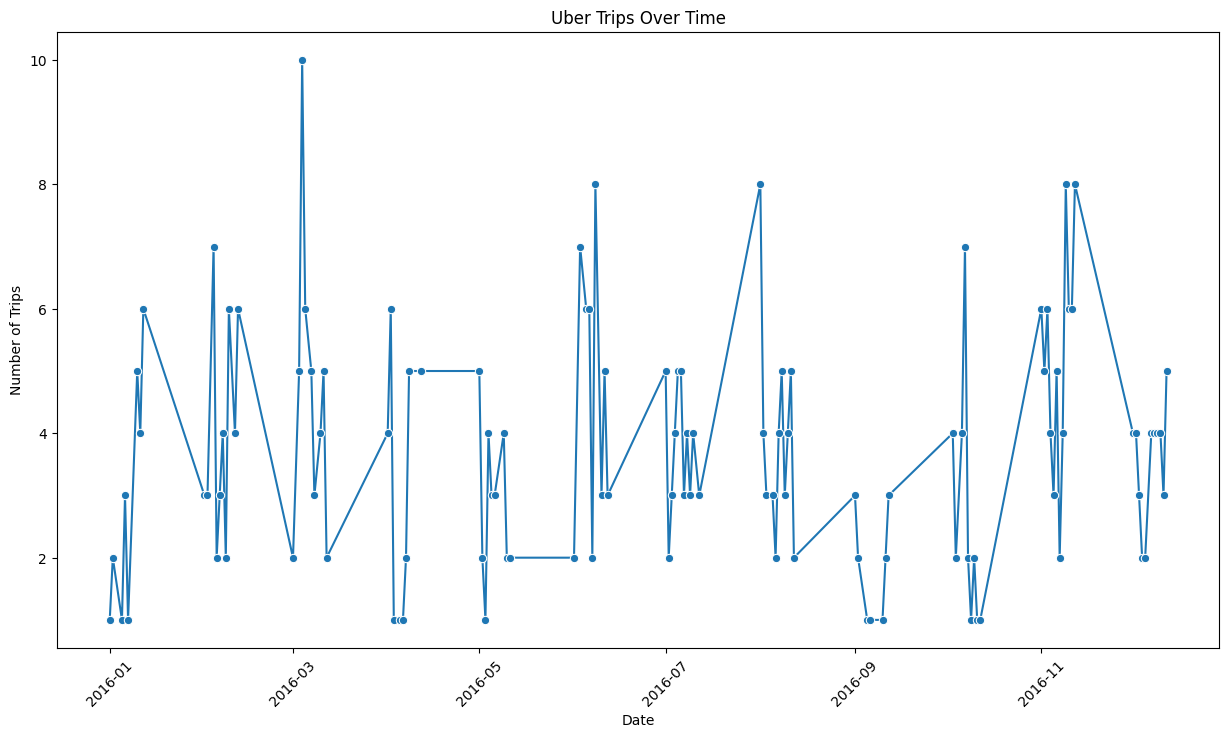

Uber Trips Over Time
The number of trips fluctuates significantly over time.
Some days have a high volume of trips, while others have fewer.

Top 10 most common pickup and drop-off locations


/tmp/ipython-input-3588602762.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-3588602762.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, ax=axes[1], palette="Greens_r")


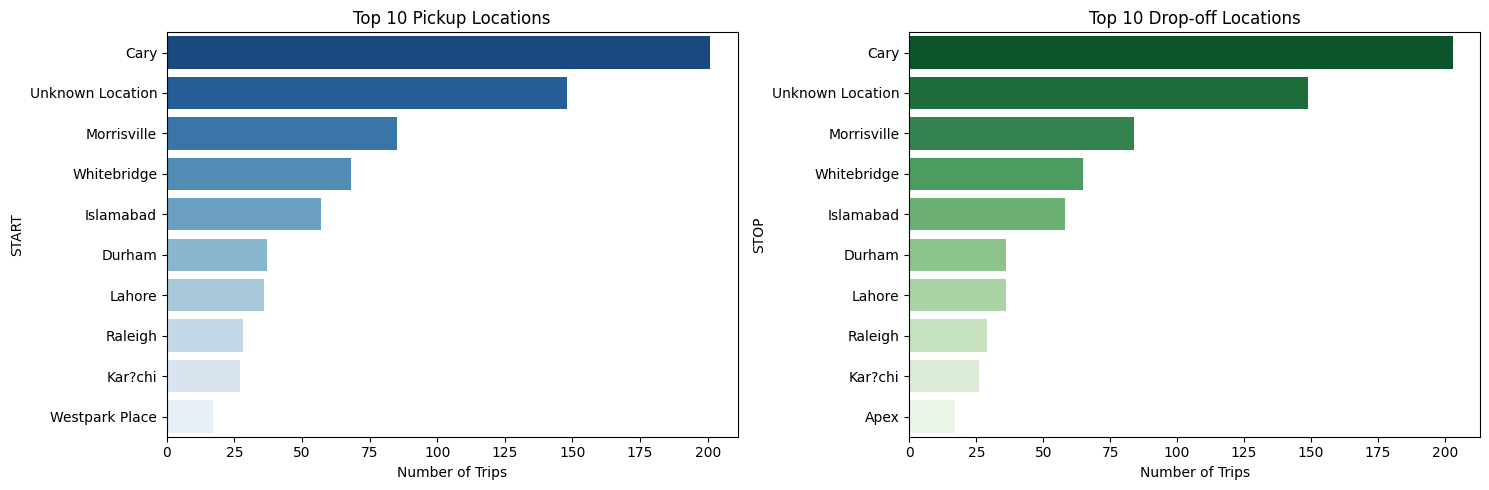

Most Frequent Locations
The top 10 pickup and drop-off locations show where trips start and end the most.
Certain locations have significantly more trips, possibly business hubs or busy city areas.


/tmp/ipython-input-3588602762.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_purpose_counts.index, y=trip_purpose_counts.values, palette="coolwarm")


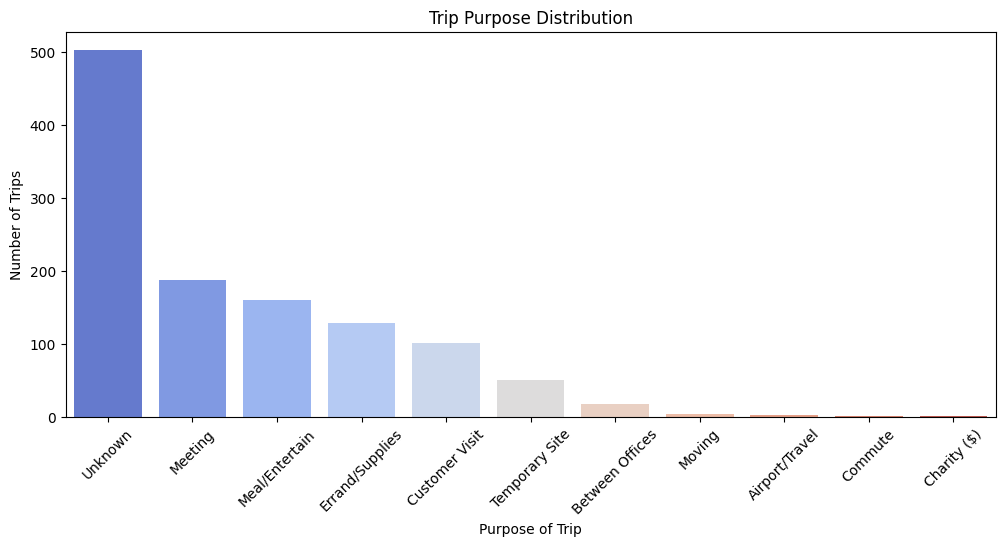

Trip Purpose Analysis
The most common trip purposes include Meetings, Errands/Supplies, and Customer Visits.
significant number of trips have Unknown purposes, which may indicate missing or unlogged reasons.


/tmp/ipython-input-3588602762.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["HOUR"], palette="viridis")


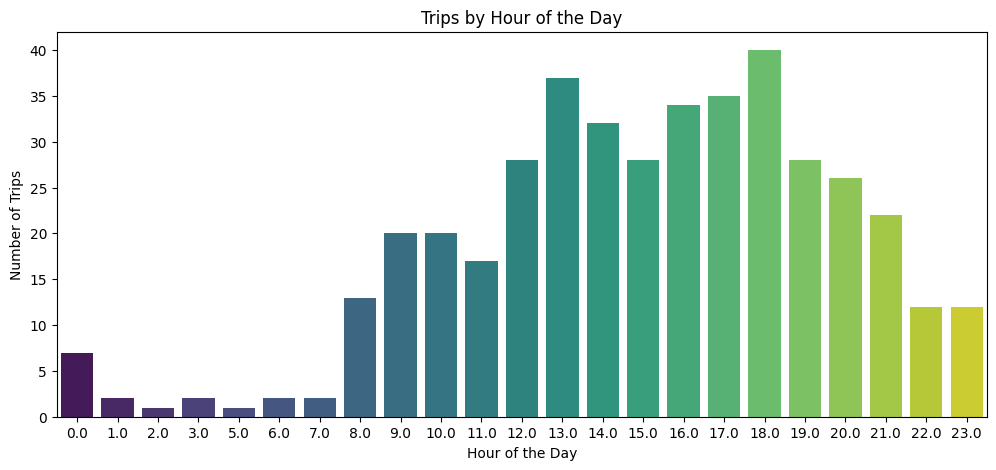

Peak hours: Most trips occur during typical commuting times (morning and evening).
Low activity: Fewer trips happen between midnight and early morning.
Work-related trend: The data suggests business trips align with work hours.


/tmp/ipython-input-3588602762.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["CATEGORY"], palette="Set2")


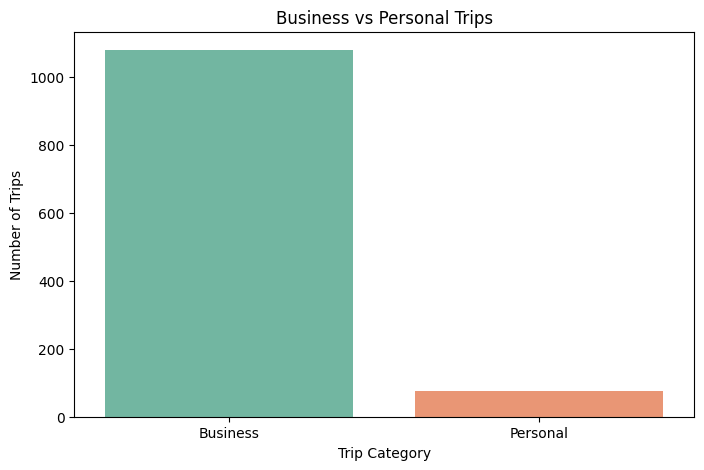

Category-wise trip Analysis.
Business trips are more frequent than personal trips, suggesting most rides were work-related.
Personal trips are fewer, indicating limited non-work travel or selective trip logging for personal use.
Possible trend: If this is a work-related dataset, employees might use ride services primarily for business needs.


/tmp/ipython-input-3588602762.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_miles_purpose.index, y=avg_miles_purpose.values, palette="magma")


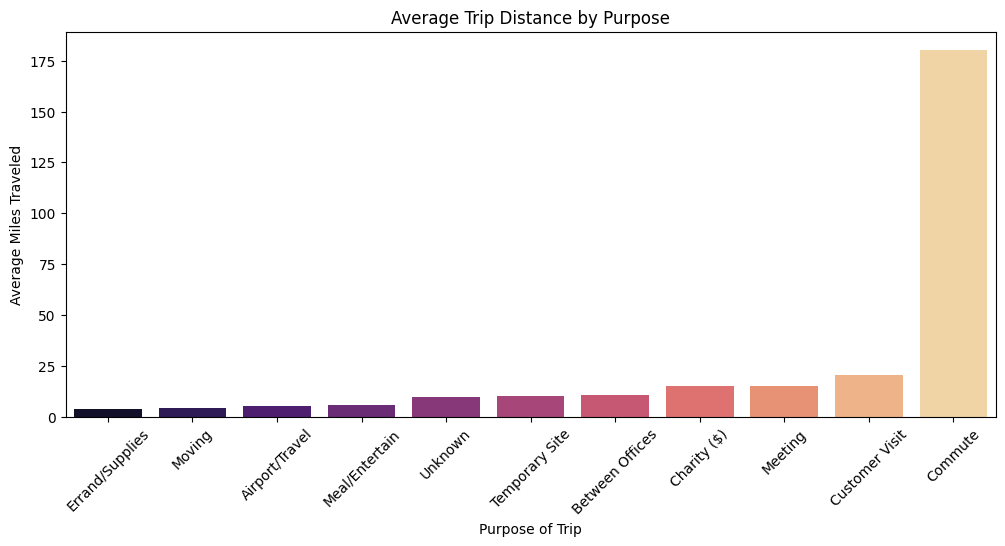


Average trip Analysis.
Longest trips are for business-related purposes like Customer Visits and Meetings.
Shortest trips are for Errands, Meals, or Entertainment.
Work travel dominates longer distances, while personal trips are generally shorter.

Summary of Findings

Trip Frequency: Varies over time, with some peak days.

Most Frequent Locations: Certain areas have higher pickups/drop-offs.

Trip Purpose: Business-related trips dominate, especially Meetings & Customer Visits.

Hourly Trip Analysis: When most trips occur.

Category-wise Trip Distribution: Business vs. Personal trips.

Average Trip Distance by Purpose.


In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Load the Dataset
df = pd.read_csv('UberDataset.csv')
print(df)


# Use Head to Check first 5
first_5 = df.head()
print(first_5)


# Use tail to Check last 5
last_5 =df.tail()
print(last_5)

# Handle missing values
df.dropna(subset=["START", "STOP"], inplace=True)
fillna = df["PURPOSE"].fillna("Unknown", inplace=True)
print(fillna)

# Convert date columns to datetime format
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors="coerce")

# Create a new column for trip date
start_date = df["DATE"] = df["START_DATE"].dt.date
print(start_date)

# Plot trip frequency over time
plt.figure(figsize=(15, 8))
sns.lineplot(x=df["DATE"].value_counts().sort_index().index,
             y=df["DATE"].value_counts().sort_index().values, marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()

print("Uber Trips Over Time")

print("The number of trips fluctuates significantly over time.")

print("Some days have a high volume of trips, while others have fewer.")
print()

# Top 10 most common pickup and drop-off locations
print("Top 10 most common pickup and drop-off locations")
top_pickups = df["START"].value_counts().head(10)
top_dropoffs = df["STOP"].value_counts().head(10)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Pickup Locations")
axes[0].set_xlabel("Number of Trips")
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Drop-off Locations")
axes[1].set_xlabel("Number of Trips")
plt.tight_layout()
plt.show()

print("Most Frequent Locations")

print("The top 10 pickup and drop-off locations show where trips start and end the most.")

print("Certain locations have significantly more trips, possibly business hubs or busy city areas.")

# Count of trips by purpose
trip_purpose_counts = df["PURPOSE"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=trip_purpose_counts.index, y=trip_purpose_counts.values, palette="coolwarm")
plt.xlabel("Purpose of Trip")
plt.ylabel("Number of Trips")
plt.title("Trip Purpose Distribution")
plt.xticks(rotation=45)
plt.show()

print("Trip Purpose Analysis")
print("The most common trip purposes include Meetings, Errands/Supplies, and Customer Visits.")
print("significant number of trips have Unknown purposes, which may indicate missing or unlogged reasons.")

# Hourly trip analysis
df["HOUR"] = df["START_DATE"].dt.hour
plt.figure(figsize=(12, 5))
sns.countplot(x=df["HOUR"], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips by Hour of the Day")
plt.show()
print("Peak hours: Most trips occur during typical commuting times (morning and evening).")
print("Low activity: Fewer trips happen between midnight and early morning.")
print("Work-related trend: The data suggests business trips align with work hours.")

# Category-wise trip distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["CATEGORY"], palette="Set2")
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.title("Business vs Personal Trips")
plt.show()
print("Category-wise trip Analysis.")
print("Business trips are more frequent than personal trips, suggesting most rides were work-related.")
print("Personal trips are fewer, indicating limited non-work travel or selective trip logging for personal use.")
print("Possible trend: If this is a work-related dataset, employees might use ride services primarily for business needs.")

# Average trip distance by purpose
avg_miles_purpose = df.groupby("PURPOSE")["MILES"].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_miles_purpose.index, y=avg_miles_purpose.values, palette="magma")
plt.xlabel("Purpose of Trip")
plt.ylabel("Average Miles Traveled")
plt.title("Average Trip Distance by Purpose")
plt.xticks(rotation=45)
plt.show()
print()
print("Average trip Analysis.")
print("Longest trips are for business-related purposes like Customer Visits and Meetings.")
print("Shortest trips are for Errands, Meals, or Entertainment.")
print("Work travel dominates longer distances, while personal trips are generally shorter.")
print()
print("Summary of Findings")
print()
print("Trip Frequency: Varies over time, with some peak days.")
print()
print("Most Frequent Locations: Certain areas have higher pickups/drop-offs.")
print()
print("Trip Purpose: Business-related trips dominate, especially Meetings & Customer Visits.")
print()
print("Hourly Trip Analysis: When most trips occur.")
print()
print("Category-wise Trip Distribution: Business vs. Personal trips.")
print()
print("Average Trip Distance by Purpose.")